In [516]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Tokenisation

In [517]:
sentences = [["I am a robot"], ["you too robot"]]
sentence_data = tf.data.Dataset.from_tensor_slices(sentences)

In [518]:
for sentence in sentence_data:
  print(sentence)

tf.Tensor([b'I am a robot'], shape=(1,), dtype=string)
tf.Tensor([b'you too robot'], shape=(1,), dtype=string)


In [519]:
output_sequence_length = 5
vocab_size = 10

In [520]:
#create/initialise text_vectorisation layer,
#adapt with the corpus --> creates the vocabulary
vectorize_layer = tf.keras.layers.TextVectorization(output_sequence_length=output_sequence_length,
                                                    max_tokens=vocab_size)

vectorize_layer.adapt(sentence_data)


# convert the corpus to tensors and apply text vectorisation
word_tensors = tf.convert_to_tensor(sentences, dtype=tf.string)
vectorized_words = vectorize_layer(word_tensors)

print("Vocabulary: ", vectorize_layer.get_vocabulary())
print("Vectorized words: ", vectorized_words)

Vocabulary:  ['', '[UNK]', 'robot', 'you', 'too', 'i', 'am', 'a']
Vectorized words:  tf.Tensor(
[[5 6 7 2 0]
 [3 4 2 0 0]], shape=(2, 5), dtype=int64)


# Embedding

###  -->Word Embedding

In [521]:
output_length = 6
word_embeddings = tf.keras.layers.Embedding(vocab_size,
                                            output_length)(vectorized_words)

word_embeddings

<tf.Tensor: shape=(2, 5, 6), dtype=float32, numpy=
array([[[ 0.03167163, -0.04952272, -0.04794666,  0.02611239,
          0.02934733,  0.04795008],
        [-0.03474723,  0.02977958, -0.03181241, -0.00794015,
          0.03685865,  0.02621522],
        [ 0.00940009,  0.01170569, -0.03331248, -0.01974404,
         -0.02249264, -0.04512664],
        [-0.04366962, -0.02670287, -0.01673762, -0.02526914,
          0.01017291,  0.00248295],
        [ 0.02201715,  0.02763268, -0.00553905,  0.01229342,
         -0.02763056,  0.02378296]],

       [[ 0.04913486, -0.00653858, -0.03732774,  0.00185645,
          0.04200152,  0.02859441],
        [ 0.02943682,  0.00413144,  0.04743451, -0.01418223,
         -0.00262751, -0.04147611],
        [-0.04366962, -0.02670287, -0.01673762, -0.02526914,
          0.01017291,  0.00248295],
        [ 0.02201715,  0.02763268, -0.00553905,  0.01229342,
         -0.02763056,  0.02378296],
        [ 0.02201715,  0.02763268, -0.00553905,  0.01229342,
         -0.0

### -->Position Embedding

In [522]:
embedded_indices = tf.keras.layers.Embedding(output_sequence_length,
                                             output_length)(tf.range(output_sequence_length))

embedded_indices

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[-0.01126494,  0.01066749,  0.02815067, -0.04247589, -0.00880954,
         0.04913098],
       [ 0.00888135,  0.02330451, -0.04036446, -0.01577993,  0.03581004,
        -0.02546831],
       [-0.02281272, -0.00611918, -0.04307184,  0.03463943,  0.02399763,
         0.00630451],
       [-0.01602601,  0.04293182,  0.01473704, -0.03722953,  0.02794535,
         0.04872229],
       [-0.02760533,  0.00557898, -0.04482066,  0.00305083, -0.00438995,
        -0.00699453]], dtype=float32)>

In [523]:
final_output_embedding = word_embeddings + embedded_indices
print("Final output: \n", final_output_embedding)


Final output: 
 tf.Tensor(
[[[ 0.02040669 -0.03885523 -0.01979599 -0.0163635   0.02053778
    0.09708106]
  [-0.02586588  0.05308409 -0.07217686 -0.02372009  0.07266869
    0.00074691]
  [-0.01341263  0.0055865  -0.07638432  0.01489539  0.00150499
   -0.03882213]
  [-0.05969563  0.01622895 -0.00200057 -0.06249867  0.03811827
    0.05120524]
  [-0.00558818  0.03321166 -0.0503597   0.01534425 -0.03202051
    0.01678842]]

 [[ 0.03786992  0.00412891 -0.00917708 -0.04061944  0.03319198
    0.07772539]
  [ 0.03831817  0.02743595  0.00707006 -0.02996217  0.03318253
   -0.06694442]
  [-0.06648234 -0.03282205 -0.05980946  0.00937029  0.03417055
    0.00878746]
  [ 0.00599114  0.0705645   0.009198   -0.02493611  0.00031479
    0.07250525]
  [-0.00558818  0.03321166 -0.0503597   0.01534425 -0.03202051
    0.01678842]]], shape=(2, 5, 6), dtype=float32)


In [524]:
class PositionEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, 
                 sequence_length, 
                 vocab_size, 
                 output_dim, 
                 **kwargs):
        super(PositionEmbeddingLayer, self).__init__(**kwargs)
        self.word_embedding_layer = tf.keras.layers.Embedding( input_dim=vocab_size,
                                                              output_dim=output_dim)


        self.position_embedding_layer = tf.keras.layers.Embedding(input_dim=sequence_length,
                                                                  output_dim=output_dim)


    def call(self, inputs):
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(tf.range(tf.shape(inputs)[-1]))
        return embedded_words + embedded_indices


In [525]:
my_embedding_layer = PositionEmbeddingLayer(output_sequence_length,
                                            vocab_size, 
                                            output_length)
embedded_layer_output = my_embedding_layer(vectorized_words)
print("Output from my_embedded_layer: ", embedded_layer_output)

Output from my_embedded_layer:  tf.Tensor(
[[[ 3.5010695e-02 -2.9602397e-02 -5.3076137e-02  1.2216736e-02
    3.7246767e-02  4.7323301e-02]
  [ 1.9252300e-04 -2.6501700e-02 -2.5653269e-02 -1.0132790e-05
    7.0237368e-03  5.0237231e-02]
  [-6.2478278e-02  5.6989245e-02  2.7659021e-02  2.9652059e-02
    3.9435610e-02  5.8232080e-02]
  [-4.6056025e-03  2.4624743e-02  3.7611239e-03 -6.3243747e-02
   -4.0564597e-02 -7.7746354e-02]
  [-4.0049054e-02 -1.1310365e-02 -9.1423243e-03  5.5149309e-02
    8.9205481e-02  7.3570438e-02]]

 [[ 6.0119726e-02 -9.1447122e-03 -9.9036857e-02  5.1655337e-02
    4.4328574e-02 -4.1023064e-02]
  [ 1.9141994e-02  5.2524880e-02 -8.1078626e-02 -4.3377772e-02
    4.3600786e-02  6.7849219e-02]
  [-8.7083176e-02  2.8899848e-02  2.5779877e-02 -3.6308315e-02
    3.4636710e-02 -3.1675480e-02]
  [ 4.2637922e-02  1.9895602e-02  9.4438083e-03  6.3751973e-03
   -5.5006407e-03 -6.2090717e-03]
  [-4.0049054e-02 -1.1310365e-02 -9.1423243e-03  5.5149309e-02
    8.9205481e-02  

# Positional Encoding

In [526]:
def get_positional_encoding(seq_len,d, n = 10000):

    P = np.zeros((seq_len,d))

    for k in range(seq_len):
        for i in range(d//2):
            P[k, 2*i] = np.sin(k/(np.power(n,2*i/d)))
            P[k, 2*i + 1] = np.cos(k/(np.power(n,2*i/d)))

    return P

get_positional_encoding(4,4)

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.00999983,  0.99995   ],
       [ 0.90929743, -0.41614684,  0.01999867,  0.99980001],
       [ 0.14112001, -0.9899925 ,  0.0299955 ,  0.99955003]])

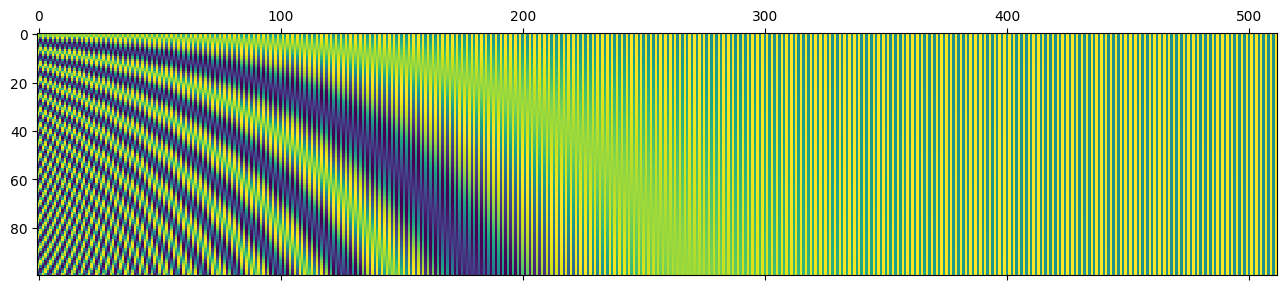

In [527]:
P = get_positional_encoding(seq_len=100, d=512, n=10000)
plt.matshow(P)

In [528]:
class PositionEmbeddingFixedWeights(tf.keras.layers.Layer):
    def __init__(self, sequence_length, vocab_size, output_dim, **kwargs):
        super(PositionEmbeddingFixedWeights, self).__init__(**kwargs)

        word_embedding_matrix     = self.get_position_encoding(vocab_size,
                                                               output_dim)

        position_embedding_matrix = self.get_position_encoding(sequence_length,
                                                               output_dim)

        self.word_embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size,
                                                              output_dim=output_dim,
                                                              weights=[word_embedding_matrix],
                                                              trainable=False)

        self.position_embedding_layer = tf.keras.layers.Embedding(input_dim=sequence_length,
                                                                  output_dim=output_dim,
                                                                  weights=[position_embedding_matrix],
                                                                  trainable=False)


    def get_position_encoding(self, seq_len, d, n=10000):
        P = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d/2)):
                denominator = np.power(n, 2*i/d)
                P[k, 2*i] = np.sin(k/denominator)
                P[k, 2*i+1] = np.cos(k/denominator)
        return P


    def call(self, inputs):
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(tf.range(tf.shape(inputs)[-1]))
        return embedded_words + embedded_indices

In [529]:
attnisallyouneed_embedding = PositionEmbeddingFixedWeights(output_sequence_length,
                                                           vocab_size,
                                                           output_length)

attnisallyouneed_output = attnisallyouneed_embedding(vectorized_words)

print("Output from my_embedded_layer: ", attnisallyouneed_output)

Output from my_embedded_layer:  tf.Tensor(
[[[-0.9589243   1.2836622   0.23000172  1.9731903   0.01077196
    1.9999421 ]
  [ 0.56205547  1.5004725   0.3213085   1.9603932   0.01508068
    1.9999142 ]
  [ 1.566284    0.3377554   0.41192317  1.9433732   0.01938933
    1.999877  ]
  [ 1.0504174  -1.4061394   0.2314966   1.9860148   0.01077211
    1.9999698 ]
  [-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]]

 [[ 0.14112     0.0100075   0.1387981   1.9903207   0.00646326
    1.9999791 ]
  [ 0.08466846 -0.11334133  0.23099795  1.9817369   0.01077207
    1.9999605 ]
  [ 1.8185948  -0.8322937   0.185397    1.9913884   0.00861771
    1.9999814 ]
  [ 0.14112     0.0100075   0.1387981   1.9903207   0.00646326
    1.9999791 ]
  [-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]]], shape=(2, 5, 6), dtype=float32)


In [530]:
technical_phrase = "to understand machine learning algorithms you need" +\
                   " to understand concepts such as gradient of a function "+\
                   "Hessians of a matrix and optimization etc"
wise_phrase = "patrick henry said give me liberty or give me death "+\
              "when he addressed the second virginia convention in march"

total_vocabulary = 200
sequence_length = 20
final_output_len = 50

phrase_vectorization_layer = tf.keras.layers.TextVectorization(output_sequence_length=sequence_length,
                                                               max_tokens=total_vocabulary)

phrase_vectorization_layer.adapt([technical_phrase, wise_phrase])

phrase_tensors = tf.convert_to_tensor([technical_phrase, wise_phrase],
                                      dtype=tf.string)


vectorized_phrases = phrase_vectorization_layer(phrase_tensors)

random_weights_embedding_layer = PositionEmbeddingLayer(sequence_length,
                                                        total_vocabulary,
                                                        final_output_len)
fixed_weights_embedding_layer = PositionEmbeddingFixedWeights(sequence_length,
                                                        total_vocabulary,
                                                        final_output_len)
random_embedding = random_weights_embedding_layer(vectorized_phrases)
fixed_embedding = fixed_weights_embedding_layer(vectorized_phrases)

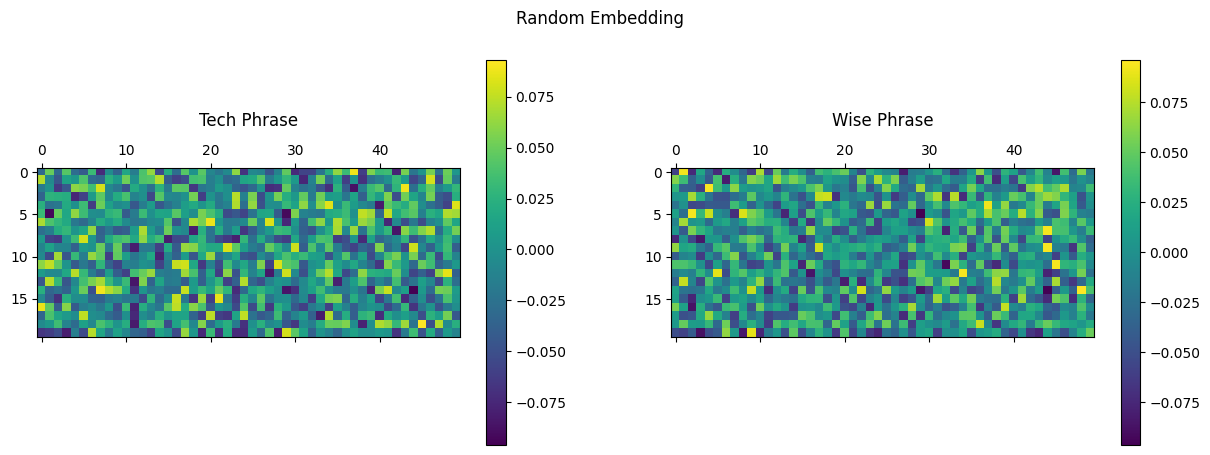

In [531]:
fig = plt.figure(figsize=(15, 5))
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(random_embedding[i, :, :], (sequence_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)
    plt.title(title[i], y=1.2)
fig.suptitle("Random Embedding")
plt.show()

# Attention

### --> Dot_Product Attention

In [532]:
class DotProductAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)

    def call(self, queries, keys, values, d_k, mask=None):
        scores = tf.matmul(queries, keys, transpose_b=True) / tf.math.sqrt(tf.cast(d_k, tf.float32))

        if mask is not None:
            scores += -1e9 * mask

        weights = tf.nn.softmax(scores)
        return tf.matmul(weights, values)

### --> Multi_head Attention

In [533]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self,
                 d_q,
                 d_k,
                 d_v,
                 d_model,
                 heads,
                 **kwargs):

        super(MultiHeadAttention,self).__init__(**kwargs)
        self.attention = DotProductAttention()

        self.d_q = d_q
        self.d_k = d_k
        self.d_v = d_v
        self.heads = heads

        self.W_q = tf.keras.layers.Dense(d_q)  #query weights
        self.W_k = tf.keras.layers.Dense(d_k)  #key weights
        self.W_v = tf.keras.layers.Dense(d_v)  #value weights
        self.W_o = tf.keras.layers.Dense(d_model)




    def reshape_tensor(self,
                       x,
                       heads,
                       flag):

        #input shape = (batch_size,sequence_length,dimension_of _model)
        #output shape = (batch_size, heads, seq_length, -1)

        if flag:
            x = tf.reshape(x,shape = (
                                    tf.shape(x)[0],
                                    tf.shape(x)[1],
                                    heads,
                                    -1) # -1 automatically decides to preserve the no of elements
                        )
            x = tf.transpose(x,perm =(0,2,1,3))
        else:
            x = tf.transpose(x,perm =(0,2,1,3))
            x = tf.reshape(x,shape = (
                                    tf.shape(x)[0],
                                    tf.shape(x)[1],
                                    self.d_k)
                          )
        return x

    def call(self, queries, keys, values, mask=None):

        q_reshaped = self.reshape_tensor(self.W_q(queries), self.heads, True)
        k_reshaped = self.reshape_tensor(self.W_k(keys), self.heads, True)
        v_reshaped = self.reshape_tensor(self.W_v(values), self.heads, True)

        o_reshaped = self.attention(q_reshaped, k_reshaped, v_reshaped, self.d_k, mask)

        output = self.reshape_tensor(o_reshaped, self.heads, False)

        return self.W_o(output)

In [534]:
heads = 8  # Number of self-attention heads
d_q = d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_model = 512  # Dimensionality of the model sub-layers' outputs
batch_size = 64  # Batch size from the training process
input_seq_length = 5  # Maximum length of the input sequence

queries = np.random.random((batch_size,
                            input_seq_length,
                            d_q))

keys = np.random.random((batch_size,
                         input_seq_length,
                         d_k))

values = np.random.random((batch_size,
                           input_seq_length,
                           d_v))

multihead_attention = MultiHeadAttention(d_q,
                                         d_k,
                                         d_v,
                                         d_model,
                                         heads)

multihead_attention(queries, keys, values)

<tf.Tensor: shape=(64, 5, 512), dtype=float32, numpy=
array([[[ 0.09958082, -0.30331114, -0.00628683, ..., -0.11963674,
         -0.02470945,  0.22953121],
        [ 0.09602682, -0.30589756, -0.00502438, ..., -0.1219731 ,
         -0.02500984,  0.22941016],
        [ 0.09801193, -0.30555493, -0.00499082, ..., -0.1253076 ,
         -0.02575686,  0.23018739],
        [ 0.09771055, -0.30593023, -0.00696616, ..., -0.12390987,
         -0.02664315,  0.23258223],
        [ 0.09898121, -0.30439138, -0.00624253, ..., -0.12454745,
         -0.02498946,  0.23178704]],

       [[ 0.24961464, -0.20643628, -0.03025011, ..., -0.13384676,
          0.03895667,  0.2272135 ],
        [ 0.24929695, -0.20839827, -0.02710361, ..., -0.13432698,
          0.03386808,  0.22655736],
        [ 0.25228518, -0.2083941 , -0.03079689, ..., -0.13676098,
          0.03378437,  0.23065782],
        [ 0.2525365 , -0.20713976, -0.02874375, ..., -0.13552639,
          0.03469865,  0.22745514],
        [ 0.2506878 , -0.2

# Feed Forward Neural Network

In [535]:
class feed_forward_network(tf.keras.layers.Layer):
    def __init__(self,d_ff1,d_ff2):
        super().__init__()

        self.fully_connected_layer_1 = tf.keras.layers.Dense(d_ff1)
        self.fully_connected_layer_2 = tf.keras.layers.Dense(d_ff2)
        self.activation = tf.keras.layers.ReLU() 

    def call(self,inputs):
        ff1 =  self.activation(self.fully_connected_layer_1(inputs))
        ff2 =  self.fully_connected_layer_2(ff1)
        return ff2

In [536]:
d_ff1 = 128
d_ff2 = 64

batch_size = 32
input_dim = 10
random_data = tf.random.normal(shape=(batch_size, input_dim))

feed_forward_layer = feed_forward_network(d_ff1, d_ff2)
output = feed_forward_layer(random_data)

output


<tf.Tensor: shape=(32, 64), dtype=float32, numpy=
array([[ 0.11321207, -0.09652776, -0.1388109 , ...,  0.09073672,
        -0.14162116,  0.1581713 ],
       [-0.10610154, -0.07236819,  0.40199843, ..., -0.20252632,
        -0.02345253, -0.68634874],
       [ 0.25434545,  0.03048793, -0.26024717, ...,  0.30664152,
         0.21829493, -0.5697406 ],
       ...,
       [-0.10602601, -0.14488082,  0.37927338, ...,  0.482693  ,
        -0.19146448, -0.32413656],
       [ 0.29850703,  0.39383227, -0.11134414, ...,  0.01986688,
         0.03396741,  0.0643153 ],
       [-0.07025468,  0.16747633, -0.09645446, ..., -0.14839302,
         0.01908729,  0.27587053]], dtype=float32)>

# Layer Normalisation

In [537]:
class add_normalisation(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self,in1,in2):
        out = in1 + in2
        return self.layer_norm(out)

In [538]:
# Sample input tensors
x1 = tf.random.normal(shape=(batch_size, input_dim))
x2 = tf.random.normal(shape=(batch_size, input_dim))  # Ensure same shape

# Create the add_normalisation layer
norm_layer = add_normalisation()

# Pass the inputs through the layer
output = norm_layer(x1, x2)
output

<tf.Tensor: shape=(32, 10), dtype=float32, numpy=
array([[ 0.2780637 ,  1.2904602 ,  1.3954072 , -0.578715  ,  0.18004431,
        -1.930253  ,  0.9287603 , -0.23919114, -1.1174563 , -0.20712048],
       [ 1.227483  , -0.3366951 ,  0.09374078, -1.0384377 ,  1.5530376 ,
         0.207656  , -1.8414915 ,  0.6605438 , -0.9222068 ,  0.3963698 ],
       [ 1.3083421 , -1.7371019 ,  0.49463278,  0.37325245,  0.7023802 ,
        -1.0057594 , -1.1883624 ,  0.23375705, -0.47779477,  1.2966542 ],
       [-0.02325342, -0.37573546, -0.6652332 , -1.1449392 , -0.23609588,
         1.1574749 ,  1.5783184 ,  1.5013982 , -0.477085  , -1.3148491 ],
       [ 0.11994793,  1.2297435 ,  1.4209428 ,  0.07744874,  0.26227203,
        -0.94176257,  0.94170445, -0.0803815 , -1.5630326 , -1.4668831 ],
       [-0.14023516,  0.17952812,  0.7302031 ,  0.8488454 ,  0.07772154,
        -2.37549   , -0.5794807 ,  1.6080059 , -0.00272343, -0.34637508],
       [ 0.3256834 ,  0.9302306 ,  0.9057037 ,  1.5041028 ,  0.25957

# Encoder Layer

In [539]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,
                 heads, 
                 d_q,
                 d_k, 
                 d_v, 
                 d_model, 
                 d_ff, 
                 rate, 
                 **kwargs):
        
        super(EncoderLayer, self).__init__(**kwargs)
        self.multihead_attention = MultiHeadAttention(d_q, 
                                                      d_k, 
                                                      d_v, 
                                                      d_model, 
                                                      heads)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.add_norm1 = add_normalisation()
        self.feed_forward = feed_forward_network(d_ff, 
                                                 d_model)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.add_norm2 = add_normalisation()


       
def call(self, x, padding_mask, training):
   
    multihead_output = self.multihead_attention(x, x, x, padding_mask)
    multihead_output = self.dropout1(multihead_output, training=training)
    addnorm_output = self.add_norm1(x, multihead_output)
   
    feedforward_output = self.feed_forward(addnorm_output)
    feedforward_output = self.dropout2(feedforward_output, training=training)
    addnorm_output = self.add_norm2(addnorm_output, feedforward_output)

    return addnorm_output
   

In [540]:
batch_size = 8
seq_len = 32
d_model = 512
heads = 8
d_ff = 2048
rate = 0.1

x = tf.random.uniform(shape=(batch_size, seq_len, d_model), minval=0.0, maxval=1.0)
padding_mask = tf.equal(tf.reduce_sum(x, axis=-1), 0.0)
training = True

encoder_layer = EncoderLayer(
                             heads = heads,
                             d_q=d_model // heads, 
                             d_k=d_model // heads, 
                             d_v=d_model // heads, 
                             d_model=d_model,
                             d_ff=d_ff, 
                             rate=rate)
output = encoder_layer(x, padding_mask, training)

# Basic output shape check
expected_output_shape = (batch_size, seq_len, d_model)
assert output.shape == expected_output_shape, f"Unexpected output shape: {output.shape}"

print("EncoderLayer output shape:", output.shape)

EncoderLayer output shape: (8, 32, 512)


# Encoder

In [541]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, 
                 vocab_size, 
                 sequence_length, 
                 h,
                 d_q, 
                 d_k, 
                 d_v, 
                 d_model, 
                 d_ff, 
                 n, 
                 rate, 
                 **kwargs):
        
        super(Encoder, self).__init__(**kwargs)
        self.pos_encoding = PositionEmbeddingFixedWeights(sequence_length, 
                                                          vocab_size, 
                                                          d_model)
        self.dropout = tf.keras.layers.Dropout(rate)
        self.encoder_layer = [EncoderLayer(
                                           h,
                                           d_q,
                                           d_k, 
                                           d_v, 
                                           d_model, 
                                           d_ff, 
                                           rate) for _ in range(n)]
 
    def call(self, 
             input_sentence, 
             padding_mask, 
             training):
        # Generate the positional encoding
        pos_encoding_output = self.pos_encoding(input_sentence)
      
        x = self.dropout(pos_encoding_output, training=training)
        for i, layer in enumerate(self.encoder_layer):
            x = layer(x, padding_mask, training)
 
        return x


In [542]:
enc_vocab_size = 20 # Vocabulary size for the encoder
input_seq_length = 5  # Maximum length of the input sequence
h = 8  # Number of self-attention heads
d_q = d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_ff = 2048  # Dimensionality of the inner fully connected layer
d_model = 512  # Dimensionality of the model sub-layers' outputs
n = 6  # Number of layers in the encoder stack

batch_size = 64  # Batch size from the training process
dropout_rate = 0.1  # Frequency of dropping the input units in the dropout layers

input_seq = np.random.random((batch_size, input_seq_length))

encoder = Encoder(enc_vocab_size, 
                  input_seq_length, 
                  h, 
                  d_q,
                  d_k, 
                  d_v, 
                  d_model, 
                  d_ff, 
                  n, 
                  dropout_rate)

encoder(input_seq, None, True)

<tf.Tensor: shape=(64, 5, 512), dtype=float32, numpy=
array([[[ 0.00000000e+00,  2.22222233e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  2.22222233e+00],
        [ 9.34967756e-01,  1.71144700e+00,  9.13173616e-01, ...,
          0.00000000e+00,  1.15181436e-04,  2.22222233e+00],
        [ 1.01033056e+00,  6.48725748e-01,  1.04046082e+00, ...,
          2.22222233e+00,  2.30362872e-04,  2.22222233e+00],
        [ 1.56800017e-01,  1.11194458e-02,  2.72317141e-01, ...,
          2.22222233e+00,  3.45544337e-04,  0.00000000e+00],
        [-8.40891719e-01,  3.84840459e-01,  0.00000000e+00, ...,
          2.22222209e+00,  0.00000000e+00,  2.22222233e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.22222233e+00,  0.00000000e+00,  0.00000000e+00],
        [ 9.34967756e-01,  1.71144700e+00,  9.13173616e-01, ...,
          2.22222233e+00,  1.15181436e-04,  2.22222233e+00],
        [ 1.01033056e+00,  6.48725748e-01,  1.04046082e+00, ..

# Decoder

In [543]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self,
                 d_q,
                 d_v,
                 d_k,
                 d_model,
                 d_ff,
                 heads,
                 rate):
        super(DecoderLayer, self).__init__()
        self.multihead_attention1 = MultiHeadAttention(d_q,
                                                       d_k, 
                                                       d_v, 
                                                       d_model,
                                                       heads)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.add_norm1 = add_normalisation()
        self.multihead_attention2 = MultiHeadAttention(d_q,
                                                       d_k, 
                                                       d_v, 
                                                       d_model,
                                                       heads)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.add_norm2 = add_normalisation()
        self.feed_forward = feed_forward_network(d_ff, d_model)
        self.dropout3 = tf.keras.layers.Dropout(rate)
        self.add_norm3 = add_normalisation()
        

def call(self, 
         x, 
         encoder_output, 
         lookahead_mask, 
         padding_mask, 
         training):
    
    
    multihead_output1 = self.multihead_attention1(x, 
                                                  x, 
                                                  x, 
                                                  lookahead_mask)
    multihead_output1 = self.dropout1(multihead_output1, 
                                      training=training)

    addnorm_output1 = self.add_norm1(x, 
                                     multihead_output1)
    
    multihead_output2 = self.multihead_attention2(addnorm_output1, 
                                                  encoder_output, 
                                                  encoder_output, 
                                                  padding_mask)
    multihead_output2 = self.dropout2(multihead_output2, 
                                      training=training)

    addnorm_output2 = self.add_norm1(addnorm_output1, 
                                     multihead_output2)

    feedforward_output = self.feed_forward(addnorm_output2)
    
    feedforward_output = self.dropout3(feedforward_output, 
                                       training=training)
    addnorm_output3 = self.add_norm3(addnorm_output2, 
                                     feedforward_output)
  
    return addnorm_output3

        

In [544]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, 
                 vocab_size, 
                 sequence_length, 
                 heads,
                 d_q,
                 d_k,
                 d_v, 
                 d_model, 
                 d_ff, 
                 n, 
                 rate):
        super(Decoder, self).__init__()
        self.pos_encoding = PositionEmbeddingFixedWeights(sequence_length, 
                                                          vocab_size,
                                                          d_model)
        self.dropout = tf.keras.layers.Dropout(rate)
        self.decoder_layer = [DecoderLayer(
                                           d_q, 
                                           d_k, 
                                           d_v, 
                                           d_model, 
                                           d_ff, 
                                           heads,
                                           rate) for _ in range(n)]
 
    def call(self, output_target, encoder_output, lookahead_mask, padding_mask, training):
        
        pos_encoding_output = self.pos_encoding(output_target)
        
        x = self.dropout(pos_encoding_output,
                         training=training)

        for i, layer in enumerate(self.decoder_layer):
            x = layer(x, 
                      encoder_output, 
                      lookahead_mask, 
                      padding_mask, 
                      training)
 
        return x

In [545]:
from numpy import random

dec_vocab_size = 20  # Vocabulary size for the decoder
input_seq_length = 5  # Maximum length of the input sequence
h = 8  # Number of self-attention heads
d_q = d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_ff = 2048  # Dimensionality of the inner fully connected layer
d_model = 512  # Dimensionality of the model sub-layers' outputs
n = 6  # Number of layers in the decoder stack

batch_size = 64  # Batch size from the training process
dropout_rate = 0.1  # Frequency of dropping the input units in the dropout layers

input_seq = random.random((batch_size, input_seq_length))
enc_output = random.random((batch_size, input_seq_length, d_model))

decoder = Decoder(dec_vocab_size, input_seq_length, h, d_q,d_k, d_v, d_model, d_ff, n, dropout_rate)
decoder(input_seq, enc_output, None, True)

<tf.Tensor: shape=(64, 5, 512), dtype=float32, numpy=
array([[[ 0.0000000e+00,  2.0000000e+00,  0.0000000e+00, ...,
          2.0000000e+00,  0.0000000e+00,  2.0000000e+00],
        [ 8.4147096e-01,  1.5403023e+00,  8.2185620e-01, ...,
          2.0000000e+00,  1.0366329e-04,  2.0000000e+00],
        [ 9.0929741e-01,  5.8385313e-01,  9.3641472e-01, ...,
          2.0000000e+00,  2.0732658e-04,  2.0000000e+00],
        [ 1.4112000e-01,  1.0007501e-02,  2.4508542e-01, ...,
          2.0000000e+00,  3.1098988e-04,  2.0000000e+00],
        [-7.5680250e-01,  3.4635639e-01, -6.5716684e-01, ...,
          1.9999999e+00,  4.1465316e-04,  2.0000000e+00]],

       [[ 0.0000000e+00,  2.0000000e+00,  0.0000000e+00, ...,
          2.0000000e+00,  0.0000000e+00,  2.0000000e+00],
        [ 8.4147096e-01,  1.5403023e+00,  8.2185620e-01, ...,
          2.0000000e+00,  1.0366329e-04,  2.0000000e+00],
        [ 9.0929741e-01,  5.8385313e-01,  9.3641472e-01, ...,
          2.0000000e+00,  2.0732658e-04,  

# Transformer Model

In [546]:
class TransformerModel(tf.keras.Model):
    '''
    supply in text vectors
    '''
    def __init__(self, 
                 enc_vocab_size, 
                 dec_vocab_size, 
                 enc_seq_length, 
                 dec_seq_length, 
                 h,
                 d_q,
                 d_k, 
                 d_v, 
                 d_model, 
                 d_ff_inner, 
                 n, 
                 rate, 
                 **kwargs):
        super(TransformerModel, self).__init__(**kwargs)
 
        self.encoder = Encoder(enc_vocab_size, 
                               enc_seq_length, 
                               h, 
                               d_q,
                               d_k, 
                               d_v, 
                               d_model, 
                               d_ff_inner, 
                               n, 
                               rate)
        
        self.decoder = Decoder(dec_vocab_size, 
                               dec_seq_length, 
                               h, 
                               d_q,
                               d_k, 
                               d_v, 
                               d_model, 
                               d_ff_inner, 
                               n, 
                               rate)
 
        self.model_last_layer = tf.keras.layers.Dense(dec_vocab_size)
        
        
    def padding_mask(self, input):
        
        # Create mask which marks the zero padding values in the input by a 1.0
        mask = tf.math.equal(input, 0)
        mask = tf.cast(mask, tf.float32)
 
        # The shape of the mask should be broadcastable to the shape
        # of the attention weights that it will be masking later on
        return mask[:, tf.expand_dims(axis = -1), tf.expand_dims(axis = -1), :]
    
    
    def lookahead_mask(self, shape):
        # Mask out future entries by marking them with a 1.0
        mask = 1 - tf.linalg.band_part(tf.ones((shape, shape)), -1, 0)
        return mask
    
    
    def __call__(self, 
              encoder_input, 
              decoder_input, 
              decoder_output,
              training):
 
        enc_padding_mask = self.padding_mask(encoder_input)
 
        # Create and combine padding and look-ahead masks to be fed into the decoder
        dec_in_padding_mask = self.padding_mask(decoder_input)
        dec_in_lookahead_mask = self.lookahead_mask(decoder_input.shape[1])
        dec_in_lookahead_mask = tf.math.maximum(dec_in_padding_mask, dec_in_lookahead_mask)
 
        encoder_output = self.encoder(encoder_input, enc_padding_mask, training)
 

        decoder_output = self.decoder(decoder_input,
                                      encoder_output, 
                                      dec_in_lookahead_mask, 
                                      enc_padding_mask, 
                                      training)
 
    
        model_output = self.model_last_layer(decoder_output)
 
        return model_output

In [547]:
enc_vocab_size = 20 # Vocabulary size for the encoder
dec_vocab_size = 20 # Vocabulary size for the decoder

enc_seq_length = 5  # Maximum length of the input sequence
dec_seq_length = 5  # Maximum length of the target sequence

h = 8  # Number of self-attention heads
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_ff = 2048  # Dimensionality of the inner fully connected layer
d_model = 512  # Dimensionality of the model sub-layers' outputs
n = 6  # Number of layers in the encoder stack

dropout_rate = 0.1  # Frequency of dropping the input units in the dropout layers

# Create model
transformer_model = TransformerModel(enc_vocab_size, 
                                  dec_vocab_size, 
                                  enc_seq_length, 
                                  dec_seq_length, 
                                  h,
                                  d_q,
                                  d_k, 
                                  d_v, 
                                  d_model, 
                                  d_ff, 
                                  n, 
                                  dropout_rate)

# Dataset

In [548]:
import pickle

with open('Datasets/english-german-both.pkl', 'rb') as f:
  clean_dataset = pickle.load(f)

clean_dataset

array([['i like both', 'ich mag beide'],
       ['she misses him', 'er fehlt ihr'],
       ['i followed him', 'ich folgte ihm'],
       ...,
       ['tom is cooking', 'tom kocht'],
       ['youre upset', 'sie sind besturzt'],
       ['do you see me', 'sehen sie mich']], dtype='<U370')

## Tokenisation

#### Example code for tokenisation

In [549]:
corpus = ["This is a sample sentence.", "Here is another one."]
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)  # Optional: Limit vocabulary size
tokenizer.fit_on_texts(corpus)

sentence = "This is a new sentence."
sequence = tokenizer.texts_to_sequences([sentence])
print(f'sequence: {sequence}')  # Output: [[1, 2, 3, ...]] (depending on the vocabulary)

word_index = tokenizer.word_index
print(f'word_index: {word_index}') # Output:


sequence: [[2, 1, 3, 5]]
word_index: {'is': 1, 'this': 2, 'a': 3, 'sample': 4, 'sentence': 5, 'here': 6, 'another': 7, 'one': 8}


In [550]:
class PrepareDataset:
    def __init__(self):
        super(PrepareDataset, self).__init__()
        self.n_sentences = 10000  # Number of sentences to include in the dataset
        self.train_split = 0.9  # Ratio of the training data split
        
    def create_tokenizer(self, dataset):
        tokenizer = tf.keras.preprocessing.text.Tokenizer()
        tokenizer.fit_on_texts(dataset)  # build the vocabulary (word index)                                      f
        return tokenizer
    
    def find_seq_length(self, dataset):
        return max(len(seq.split()) for seq in dataset)
 
    def find_vocab_size(self, tokenizer, dataset):
        tokenizer.fit_on_texts(dataset)
        return len(tokenizer.word_index) + 1
    
    
    def __call__(self, filename,shuffle = True ,**kwargs):
         import pickle
         clean_dataset = pickle.load(open(filename, 'rb'))
         
         dataset = clean_dataset[:self.n_sentences, :]
         
         # Include start and end of string tokens
         for i in range(dataset[:, 0].size):
             dataset[i, 0] = "<START> " + dataset[i, 0] + " <EOS>"
             dataset[i, 1] = "<START> " + dataset[i, 1] + " <EOS>"
         
         # Random shuffle the dataset
         if shuffle == True:
            np.random.shuffle(dataset)
         
         # Split the dataset
         train = dataset[:int(self.n_sentences * self.train_split)]
         enc_tokenizer = self.create_tokenizer(train[:, 0])
         enc_seq_length = self.find_seq_length(train[:, 0])
         enc_vocab_size = self.find_vocab_size(enc_tokenizer, train[:, 0])
         
         # Encode and pad the input sequences
         trainX = enc_tokenizer.texts_to_sequences(train[:, 0])
         trainX = tf.keras.utils.pad_sequences(trainX, maxlen=enc_seq_length, padding='post')
         trainX = tf.convert_to_tensor(trainX, dtype=tf.int64)
         
         # Prepare tokenizer for the decoder input
         dec_tokenizer = self.create_tokenizer(train[:, 1])
         dec_seq_length = self.find_seq_length(train[:, 1])
         dec_vocab_size = self.find_vocab_size(dec_tokenizer, train[:, 1])
         
         # Encode and pad the input sequences
         trainY = dec_tokenizer.texts_to_sequences(train[:, 1])
         trainY = tf.keras.utils.pad_sequences(trainY, maxlen=dec_seq_length, padding='post')
         trainY = tf.convert_to_tensor(trainY, dtype=tf.int64)
         
         return trainX, trainY, train, enc_seq_length, dec_seq_length, enc_vocab_size, dec_vocab_size      

In [551]:
dataset = PrepareDataset()
trainX, trainY, train_orig, enc_seq_length, dec_seq_length, enc_vocab_size, dec_vocab_size = dataset('Datasets/english-german-both.pkl')
 
print(train_orig[0, 0], '\n', trainX[0, :])

<START> he never laughs <EOS> 
 tf.Tensor([   1    9  169 1437    2    0    0], shape=(7,), dtype=int64)


In [552]:
def loss_fcn(target, prediction):
    # Create mask so that the zero padding values are not included in the computation of loss
    padding_mask = tf.math.logical_not(equal(target, 0))
    padding_mask = tf.cast(padding_mask, tf.float32)
 
    # Compute a sparse categorical cross-entropy loss on the unmasked values
    loss = tf.keras.losses.SparseCategoricalCrossentropy(target, prediction, from_logits=True) * padding_mask
 
    # Compute the mean loss over the unmasked values
    return tf.math.reduce_sum(loss) / tf.math.reduce_sum(padding_mask)

In [553]:
def accuracy_fcn(target, prediction):
    # Create mask so that the zero padding values are not included in the computation of accuracy
    padding_mask = tf.math.logical_not(math.equal(target, 0))

    # Find equal prediction and target values, and apply the padding mask
    accuracy = tf.equal(target, argmax(prediction, axis=2))
    accuracy = tf.math.logical_and(padding_mask, accuracy)

    # Cast the True/False values to 32-bit-precision floating-point numbers
    padding_mask = tf.cast(padding_mask, tf.float32)
    accuracy = tf.cast(accuracy, tf.float32)

    # Compute the mean accuracy over the unmasked values
    return tf.mathreduce_sum(accuracy) / tf.math.reduce_sum(padding_mask)

# Training

In [554]:
# Define the model parameters
h = 8  # Number of self-attention heads
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_model = 512  # Dimensionality of model layers' outputs
d_ff = 2048  # Dimensionality of the inner fully connected layer
n = 6  # Number of layers in the encoder stack

# Define the training parameters
epochs = 2
batch_size = 64
beta_1 = 0.9
beta_2 = 0.98
epsilon = 1e-9
dropout_rate = 0.1

In [555]:
optimizer = tf.keras.optimizers.Adam(0.001, 
                                     beta_1, 
                                     beta_2, 
                                     epsilon)

In [556]:
train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY))
train_dataset = train_dataset.batch(batch_size)

In [557]:
training_model = TransformerModel(enc_vocab_size, 
                                  dec_vocab_size, 
                                  enc_seq_length, 
                                  dec_seq_length, 
                                  h, 
                                  d_q,
                                  d_k, 
                                  d_v, 
                                  d_model, 
                                  d_ff, 
                                  n, 
                                  dropout_rate)
 

In [558]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')


In [559]:
# Speeding up the training process
@tf.function
def train_step(encoder_input, decoder_input, decoder_output):
    with tf.GradientTape() as tape:

        # Run the forward pass of the model to generate a prediction
        prediction = training_model(encoder_input, decoder_input, decoder_output,training=True)

        # Compute the training loss
        loss = loss_fcn(decoder_output, prediction)

        # Compute the training accuracy
        accuracy = accuracy_fcn(decoder_output, prediction)

    # Retrieve gradients of the trainable variables with respect to the training loss
    gradients = tape.gradient(loss, training_model.trainable_weights)

    # Update the values of the trainable variables by gradient descent
    optimizer.apply_gradients(zip(gradients, training_model.trainable_weights))

    train_loss(loss)
    train_accuracy(accuracy)


for epoch in range(epochs):

    train_loss.reset_states()
    train_accuracy.reset_states()

    print("\nStart of epoch %d" % (epoch + 1))

    # Iterate over the dataset batches
    for step, (train_batchX, train_batchY) in enumerate(train_dataset):

        # Define the encoder and decoder inputs, and the decoder output
        encoder_input = train_batchX[:, 1:]
        decoder_input = train_batchY[:, :-1]
        decoder_output = train_batchY[:, 1:]

        train_step(encoder_input, decoder_input, decoder_output)

        if step % 50 == 0:
            print(f'Epoch {epoch + 1} Step {step} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
            # print("Samples so far: %s" % ((step + 1) * batch_size))

    # Print epoch number and loss value at the end of every epoch
    print("Epoch %d: Training Loss %.4f, Training Accuracy %.4f" % (epoch + 1, train_loss.result(), train_accuracy.result()))


Start of epoch 1


TypeError: in user code:

    File "C:\Users\Dell\AppData\Local\Temp\ipykernel_3428\3123495666.py", line 7, in train_step  *
        prediction = training_model(encoder_input, decoder_input, decoder_output,training=True)
    File "C:\Users\Dell\AppData\Local\Temp\ipykernel_3428\246144039.py", line 69, in __call__  *
        enc_padding_mask = self.padding_mask(encoder_input)
    File "C:\Users\Dell\AppData\Local\Temp\ipykernel_3428\775414444.py", line 54, in padding_mask  *
        return mask[:, tf.expand_dims(axis = -1), tf.expand_dims(axis = -1), :]

    TypeError: Missing required positional argument
